In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scipy.stats as ss
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import LeaveOneOut
import mifs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import scipy
import numpy as np, scipy.stats as st
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from scipy import interp
from collections import Counter
# import warnings filter
from warnings import simplefilter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
import string


Using TensorFlow backend.


In [2]:
adm=pd.read_csv('ADMISSIONS.csv')
patient=pd.read_csv('PATIENTS.csv')
micro=pd.read_csv('MICROBIOLOGYEVENTS.csv')
lab=pd.read_csv('LABEVENTS.csv')
diag=pd.read_csv('DIAGNOSES_ICD.csv')
drg=pd.read_csv('DRGCODES.csv')
note=pd.read_csv('NOTEEVENTS.csv')

/home/shayantan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
adm.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1


In [4]:
patient.head(3)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0


In [5]:
micro.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
lab.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN


In [7]:
diag.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281


In [8]:
drg.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [9]:
patient.head(3)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0


In [10]:
adm.groupby(['ADMISSION_TYPE']).size()

ADMISSION_TYPE
ELECTIVE      7706
EMERGENCY    42071
NEWBORN       7863
URGENT        1336
dtype: int64

In [11]:
# convert to dates
adm.ADMITTIME = pd.to_datetime(adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.date
adm.DISCHTIME = pd.to_datetime(adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.date
adm.DEATHTIME = pd.to_datetime(adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.date
patient.DOB=pd.to_datetime(patient.DOB, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.date
lab.CHARTTIME=pd.to_datetime(lab.CHARTTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.date

In [12]:
#only considering coronary atherosclerosis patients
diag_cad=diag[diag.ICD9_CODE=="41401"]
print("There are around ",diag_cad.shape[0],"patients who was diagnosed with coronary atherosclerosis")

There are around  12429 patients who was diagnosed with coronary atherosclerosis


### Merging ADMISSION and DIAGNOSIS tables

In [13]:
merged_diag_adm = pd.merge(adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','ADMISSION_TYPE','RELIGION','LANGUAGE','DEATHTIME','INSURANCE','ETHNICITY']],
                        diag_cad[['SUBJECT_ID','HADM_ID',]], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')


In [14]:
merged_diag_adm['mortality_period']=merged_diag_adm['DEATHTIME']-merged_diag_adm['ADMITTIME']

In [15]:
merged_diag_adm['mortality_period']=merged_diag_adm['mortality_period'].dt.days

In [16]:
merged_diag_adm['LABEL'] = (merged_diag_adm['mortality_period']< 30).astype('int')

In [17]:
merged_diag_adm.groupby(['LABEL']).size()

LABEL
0    53530
1     5447
dtype: int64

In [18]:
merged_diag_adm.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_TYPE',
       'RELIGION', 'LANGUAGE', 'DEATHTIME', 'INSURANCE', 'ETHNICITY',
       'mortality_period', 'LABEL'],
      dtype='object')

In [19]:
patient.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

### Merging of the previous consolidated table with PATIENTS table (to get the DOB information)

In [20]:
merged_diag_adm_patient = pd.merge(merged_diag_adm[['SUBJECT_ID','HADM_ID','RELIGION','LANGUAGE','ADMITTIME','DISCHTIME','ADMISSION_TYPE','INSURANCE','ETHNICITY','DEATHTIME','mortality_period','LABEL']],
                        patient[['SUBJECT_ID','DOB']], 
                        on = ['SUBJECT_ID'],
                        how = 'left')


In [21]:
merged_diag_adm_patient['Age']=((merged_diag_adm_patient['ADMITTIME']-merged_diag_adm_patient['DOB'])// 365).dt.days
merged_diag_adm_patient.loc[merged_diag_adm_patient['Age']>=300,'Age']=merged_diag_adm_patient.loc[merged_diag_adm_patient['Age']>=300,'Age']-211
merged_diag_adm_patient=merged_diag_adm_patient.loc[merged_diag_adm_patient['Age']<89]

In [22]:
positive=merged_diag_adm_patient[merged_diag_adm_patient.LABEL==0]
negative=merged_diag_adm_patient[merged_diag_adm_patient.LABEL==1]

/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


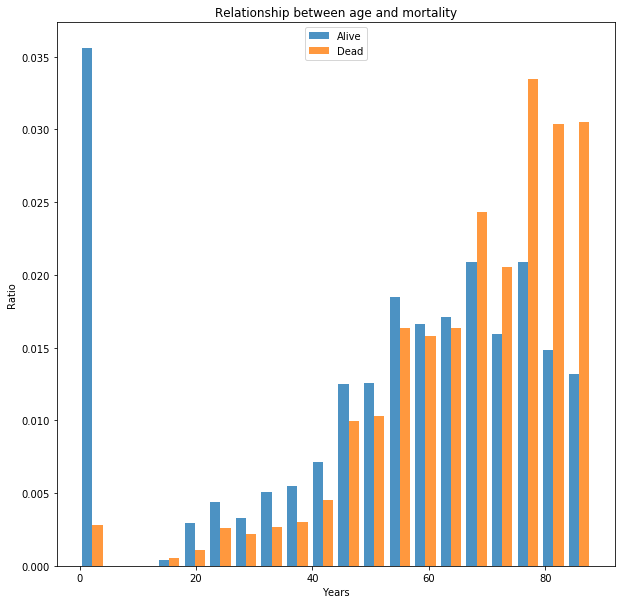

In [23]:
plt.figure(figsize=(10,10))
plt.hist([positive['Age'],negative['Age']], bins=20, alpha=0.8, normed=True, label=['Alive','Dead'])
plt.title('Relationship between age and mortality')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.legend(loc='upper center')

/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


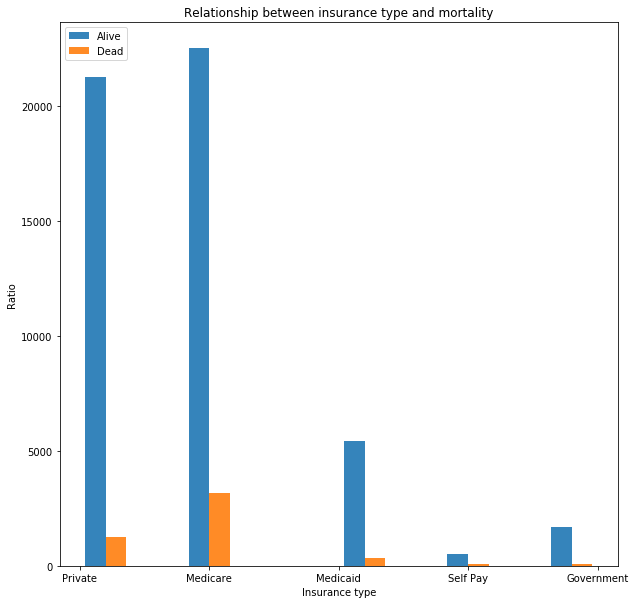

In [24]:
plt.figure(figsize=(10,10))
plt.hist([positive['INSURANCE'],negative['INSURANCE']], bins=10, alpha=0.9, normed=False, label=['Alive','Dead'])
plt.title('Relationship between insurance type and mortality')
plt.xlabel('Insurance type')
plt.ylabel('Ratio')
plt.legend(loc='upper left')

In [25]:
positive['ETHNICITY']=pd.Categorical(positive['ETHNICITY'])
negative['ETHNICITY']=pd.Categorical(negative['ETHNICITY'])

/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
names=positive['ETHNICITY'].cat.categories

/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


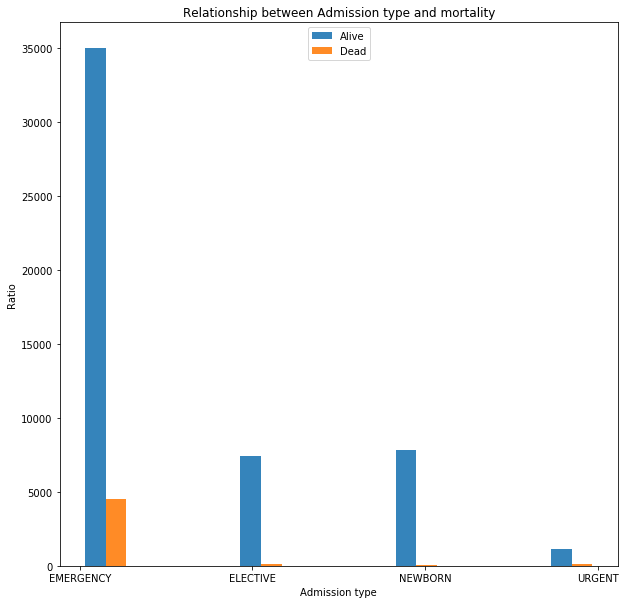

In [27]:
plt.figure(figsize=(10,10))
plt.hist([positive['ADMISSION_TYPE'],negative['ADMISSION_TYPE']], bins=10, alpha=0.9, normed=False, label=['Alive','Dead'])
plt.title('Relationship between Admission type and mortality')
plt.xlabel('Admission type')
plt.ylabel('Ratio')
plt.legend(loc='upper center')

In [28]:
positive['RELIGION']=pd.Categorical(positive['RELIGION'])
names_rel=positive['RELIGION'].cat.categories

/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x7fefcce31da0>,
 <a list of 20 Text xticklabel objects>)

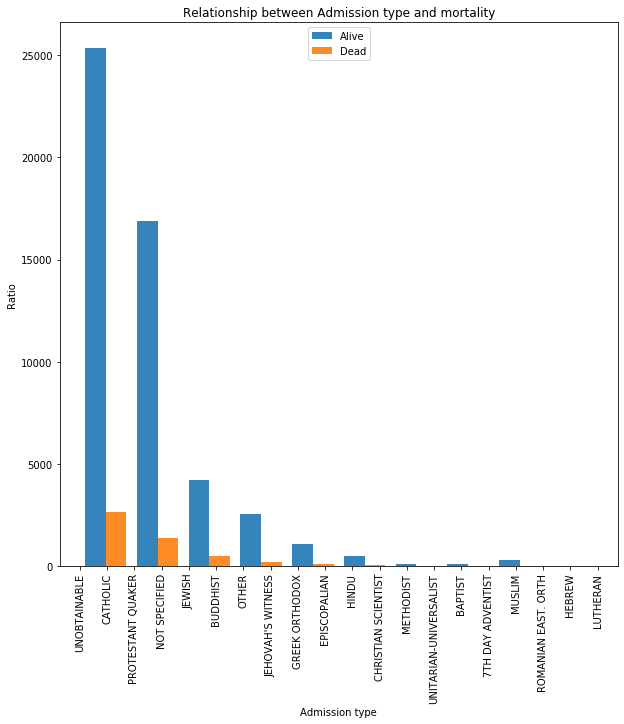

In [29]:
plt.figure(figsize=(10,10))
xvals=range(20)
plt.hist([positive[~pd.isnull(positive.RELIGION)]['RELIGION'],negative[~pd.isnull(negative.RELIGION)]['RELIGION']], bins=10, alpha=0.9, normed=False, label=['Alive','Dead'])
plt.title('Relationship between Admission type and mortality')
plt.xlabel('Admission type')
plt.ylabel('Ratio')
plt.legend(loc='upper center')
plt.xticks(xvals,rotation=90)

In [30]:
merged_diag_adm_patient.columns


Index(['SUBJECT_ID', 'HADM_ID', 'RELIGION', 'LANGUAGE', 'ADMITTIME',
       'DISCHTIME', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY', 'DEATHTIME',
       'mortality_period', 'LABEL', 'DOB', 'Age'],
      dtype='object')

## Model using only demographic data

In [239]:
X_dem=merged_diag_adm_patient[['RELIGION','LANGUAGE','ADMISSION_TYPE','INSURANCE','ETHNICITY','Age']]
y_dem=merged_diag_adm_patient[['LABEL']]
X_d = pd.get_dummies(X_dem)

In [240]:
X_train_dem, X_valid_dem, y_train_dem, y_valid_dem = train_test_split(X_d, y_dem, test_size=0.33, random_state=42,stratify=y_dem)

#### Logit

In [34]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X_train_dem, y_train_dem)
print(classification_report(y_valid_dem,clf.predict(X_valid_dem)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16970
           1       0.00      0.00      0.00      1617

    accuracy                           0.91     18587
   macro avg       0.46      0.50      0.48     18587
weighted avg       0.83      0.91      0.87     18587



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Model is suffering from imbalance. So trying different sampling techniques

### Undersampling

In [35]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import     OneSidedSelection 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE


In [36]:
def undersampling(X_train,y_train):
    redn=RepeatedEditedNearestNeighbours()
    X_redn, y_redn = redn.fit_resample(X_train, y_train)
    print("REDN done")
    edn=EditedNearestNeighbours()
    X_edn, y_edn = edn.fit_resample(X_train, y_train)
    print("EDN done")
    allknn=AllKNN()
    X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)
    print("ALLKNN done")
    tmk=TomekLinks()
    X_tmk,y_tmk=tmk.fit_resample(X_train,y_train)
    print("TMK done")
    iht=InstanceHardnessThreshold()
    X_iht,y_iht=iht.fit_resample(X_train,y_train)
    print("IHT done")
    nm=NearMiss()
    X_nm,y_nm=nm.fit_resample(X_train,y_train)
    print("NM done")
    ncr=NeighbourhoodCleaningRule()
    X_ncr,y_ncr=ncr.fit_resample(X_train,y_train)
    print("NCR done")
    oss=OneSidedSelection()
    X_oss,y_oss=oss.fit_resample(X_train,y_train)
    print("OSS done")
    rus=RandomUnderSampler()
    X_rus,y_rus=rus.fit_resample(X_train,y_train)
    print("RUS done")
    return X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus

In [37]:
def classification(X_train,y_train,X_test,y_test):
    classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=19,min_samples_split=10),
    RandomForestClassifier(n_estimators=450),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=300),
    GaussianNB(),
    LogisticRegression(C=1,penalty='l1'),
    LinearDiscriminantAnalysis()]
    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
    
        print("="*30)
        print(name)
    
        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = roc_auc_score(y_test, train_predictions)
        print("AUC: {:.4%}".format(acc))
        print("Classification report: \n",classification_report_imbalanced(y_test,train_predictions))
    
       
    print("="*30)

### Results of different undersampling techniques

In [38]:
def undersampling_results(X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus,X_valid,y_valid):
    print("Repeated Edited Nearest Neighbors results \n")
    classification(X_redn,y_redn,X_valid,y_valid)
    print("Edited Nearest Neighbors results \n")
    classification(X_edn,y_edn,X_valid,y_valid)
    print("ALL k-Nearest Neighbors results \n")
    classification(X_allknn,y_allknn,X_valid,y_valid)
    print("Tomek links results \n")
    classification(X_tmk,y_tmk,X_valid,y_valid)
    print("Instance hardness threshold results \n")
    classification(X_iht,y_iht,X_valid,y_valid)
    print("Near Miss results \n")
    classification(X_nm,y_nm,X_valid,y_valid)
    print("Neighborhood cleaning rule results \n")
    classification(X_ncr,y_ncr,X_valid,y_valid)
    print("One sided selection results \n")
    classification(X_oss,y_oss,X_valid,y_valid)
    print("Random Undersampler results \n")
    classification(X_rus,y_rus,X_valid,y_valid)

### Oversampling


In [46]:
def oversampling(X_train,y_train):
    sm = SMOTE(random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)
    print("SMOTE done")
    ros=RandomOverSampler(random_state=42)
    X_ros,y_ros = ros.fit_resample(X_train, y_train)
    
    print("ROS done")

    
    ada=ADASYN(random_state=42)
    X_ada,y_ada = ada.fit_resample(X_train, y_train)
    print("ADASYN done")    
    svmsmote=SVMSMOTE()
    X_smotesvm,y_smotesvm=svmsmote.fit_resample(X_train, y_train)
    print("SMOTESVM done")
    bsmote=BorderlineSMOTE(random_state=42)
    X_bsmote,y_bsmote=bsmote.fit_resample(X_train, y_train)
    print("Borderline SMOTE done")
    return X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote

### Results of different oversampling techniques

In [40]:
def oversampling_results(X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote,X_valid,y_valid):
    print("SMOTEresults \n")
    classification(X_sm,y_sm,X_valid,y_valid)
    print("ROS results \n")
    classification(X_ros,y_ros,X_valid,y_valid)
    print("ADASYN results \n")
    classification(X_ada,y_ada,X_valid,y_valid)
    print("SMOTESVM results \n")
    classification(X_smotesvm,y_smotesvm,X_valid,y_valid)
    print("Borderline SMOTE results \n")
    classification(X_bsmote,y_bsmote,X_valid,y_valid)

### Ensemble techniques

In [41]:
from imblearn.ensemble import BalanceCascade
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier


In [42]:
def ensemble(X_train,y_train,X_valid,y_valid):
    bbc=BalancedBaggingClassifier().fit(X_train,y_train)
    brf=BalancedRandomForestClassifier().fit(X_train,y_train)
    eec=EasyEnsembleClassifier().fit(X_train,y_train)
    rusb=RUSBoostClassifier().fit(X_train,y_train)
    ada=AdaBoostClassifier().fit(X_train,y_train)
    print("BBC")
    print(classification_report_imbalanced(y_valid,bbc.predict(X_valid))," ",roc_auc_score(y_valid,bbc.predict(X_valid)))
    print("BRF")
    print(classification_report_imbalanced(y_valid,brf.predict(X_valid))," ",roc_auc_score(y_valid,brf.predict(X_valid)))
    print("EEC")
    print(classification_report_imbalanced(y_valid,eec.predict(X_valid))," ",roc_auc_score(y_valid,eec.predict(X_valid)))
    print("RUS")
    print(classification_report_imbalanced(y_valid,rusb.predict(X_valid))," ",roc_auc_score(y_valid,rusb.predict(X_valid)))
    print("ada")
    print(classification_report_imbalanced(y_valid,ada.predict(X_valid))," ",roc_auc_score(y_valid,ada.predict(X_valid)))

### Undersampling results using only demographic data

In [43]:
X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus=undersampling(X_train_dem,y_train_dem)
undersampling_results(X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus,X_valid_dem,y_valid_dem)


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


REDN done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EDN done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ALLKNN done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TMK done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IHT done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NM done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NCR done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OSS done
RUS done
Repeated Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 62.7074%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.60      0.66      0.73      0.63      0.39     16970
          1       0.13      0.66      0.60      0.22      0.63      0.39      1617

avg / total       0.88      0.60      0.65      0.69      0.63      0.39     18587

DecisionTreeClassifier
****Results****
AUC: 62.7886%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.60      0.65      0.74      0.63      0.39     16970
          1       0.14      0.65      0.60      0.22      0.63      0.40      1617

avg / total       0.88      0.61      0.65      0.69      0.63      0.39     18587

RandomForestClassifier
****Results****
AUC: 62.9653%
Classification report: 
                    pre       rec    

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 65.1777%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.75      0.55      0.84      0.64      0.42     16970
          1       0.18      0.55      0.75      0.27      0.64      0.41      1617

avg / total       0.88      0.74      0.57      0.79      0.64      0.42     18587

Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 56.5193%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.85      0.28      0.89      0.49      0.25     16970
          1       0.15      0.28      0.85      0.20      0.49      0.22      1617

avg / total       0.86      0.80      0.33      0.83      0.49      0.25     18587

DecisionTreeClassifier
****Results****
AUC: 56.6715%
Classification report: 
                    pre       rec       spe        f1       

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 52.7310%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.98      0.07      0.95      0.27      0.08     16970
          1       0.28      0.07      0.98      0.11      0.27      0.06      1617

avg / total       0.86      0.90      0.15      0.88      0.27      0.08     18587

ALL k-Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 57.8395%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.83      0.33      0.88      0.52      0.28     16970
          1       0.16      0.33      0.83      0.21      0.52      0.26      1617

avg / total       0.86      0.79      0.37      0.82      0.52      0.28     18587

DecisionTreeClassifier
****Results****
AUC: 57.2424%
Classification report: 
                    pre       rec       spe        f1       g

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 53.8866%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.11      0.95      0.32      0.11     16970
          1       0.27      0.11      0.97      0.15      0.32      0.09      1617

avg / total       0.86      0.90      0.18      0.88      0.32      0.11     18587

Tomek links results 

KNeighborsClassifier
****Results****
AUC: 51.9105%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.07      0.94      0.25      0.07     16970
          1       0.18      0.07      0.97      0.10      0.25      0.06      1617

avg / total       0.85      0.89      0.15      0.87      0.25      0.07     18587

DecisionTreeClassifier
****Results****
AUC: 50.6992%
Classification report: 
                    pre       rec       spe        f1       geo       iba

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 50.0854%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.91      1.00      0.00      0.95      0.05      0.00     16970
          1       0.24      0.00      1.00      0.00      0.05      0.00      1617

avg / total       0.85      0.91      0.09      0.87      0.05      0.00     18587

Instance hardness threshold results 

KNeighborsClassifier
****Results****
AUC: 60.5171%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.56      0.65      0.71      0.60      0.36     16970
          1       0.12      0.65      0.56      0.21      0.60      0.37      1617

avg / total       0.87      0.57      0.64      0.66      0.60      0.36     18587

DecisionTreeClassifier
****Results****
AUC: 61.2767%
Classification report: 
                    pre       rec       spe        f1    

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 66.1601%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.70      0.62      0.81      0.66      0.44     16970
          1       0.17      0.62      0.70      0.26      0.66      0.43      1617

avg / total       0.88      0.70      0.63      0.76      0.66      0.44     18587

Near Miss results 

KNeighborsClassifier
****Results****
AUC: 51.2128%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.33      0.69      0.49      0.48      0.22     16970
          1       0.09      0.69      0.33      0.16      0.48      0.24      1617

avg / total       0.85      0.36      0.66      0.46      0.48      0.22     18587

DecisionTreeClassifier
****Results****
AUC: 49.2785%
Classification report: 
                    pre       rec       spe        f1       geo       iba  

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 53.7735%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.93      0.15      0.92      0.37      0.15     16970
          1       0.16      0.15      0.93      0.16      0.37      0.13      1617

avg / total       0.85      0.86      0.22      0.86      0.37      0.15     18587

DecisionTreeClassifier
****Results****
AUC: 52.6304%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.09      0.94      0.29      0.09     16970
          1       0.19      0.09      0.97      0.12      0.29      0.08      1617

avg / total       0.85      0.89      0.16      0.87      0.29      0.09     18587

RandomForestClassifier
****Results****
AUC: 53.5396%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 51.5223%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.99      0.04      0.95      0.20      0.04     16970
          1       0.27      0.04      0.99      0.07      0.20      0.04      1617

avg / total       0.86      0.91      0.12      0.87      0.20      0.04     18587

One sided selection results 

KNeighborsClassifier
****Results****
AUC: 51.4131%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.98      0.05      0.95      0.21      0.05     16970
          1       0.20      0.05      0.98      0.07      0.21      0.04      1617

avg / total       0.85      0.90      0.13      0.87      0.21      0.05     18587

DecisionTreeClassifier
****Results****
AUC: 50.6933%
Classification report: 
                    pre       rec       spe        f1       geo  

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


LinearDiscriminantAnalysis
****Results****
AUC: 50.0854%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.91      1.00      0.00      0.95      0.05      0.00     16970
          1       0.24      0.00      1.00      0.00      0.05      0.00      1617

avg / total       0.85      0.91      0.09      0.87      0.05      0.00     18587

Random Undersampler results 

KNeighborsClassifier
****Results****
AUC: 62.0351%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.62      0.62      0.75      0.62      0.38     16970
          1       0.13      0.62      0.62      0.22      0.62      0.38      1617

avg / total       0.87      0.62      0.62      0.70      0.62      0.38     18587

DecisionTreeClassifier
****Results****
AUC: 64.4915%
Classification report: 
                    pre       rec       spe        f1       geo  

/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestClassifier
****Results****
AUC: 63.2865%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.61      0.66      0.74      0.63      0.40     16970
          1       0.14      0.66      0.61      0.23      0.63      0.40      1617

avg / total       0.88      0.61      0.65      0.70      0.63      0.40     18587



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier
****Results****
AUC: 67.4384%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.60      0.75      0.74      0.67      0.44     16970
          1       0.15      0.75      0.60      0.25      0.67      0.46      1617

avg / total       0.89      0.61      0.74      0.69      0.67      0.44     18587



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier
****Results****
AUC: 67.6272%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.61      0.75      0.74      0.67      0.45     16970
          1       0.15      0.75      0.61      0.25      0.67      0.46      1617

avg / total       0.89      0.62      0.73      0.70      0.67      0.45     18587

GaussianNB
****Results****
AUC: 59.6159%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.27      0.93      0.42      0.50      0.23     16970
          1       0.11      0.93      0.27      0.19      0.50      0.26      1617

avg / total       0.90      0.32      0.87      0.40      0.50      0.23     18587



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression
****Results****
AUC: 68.0378%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.60      0.76      0.74      0.68      0.45     16970
          1       0.15      0.76      0.60      0.26      0.68      0.46      1617

avg / total       0.89      0.61      0.75      0.70      0.68      0.45     18587

LinearDiscriminantAnalysis
****Results****
AUC: 68.1304%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.59      0.77      0.73      0.68      0.45     16970
          1       0.15      0.77      0.59      0.25      0.68      0.46      1617

avg / total       0.89      0.61      0.76      0.69      0.68      0.45     18587



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Oversampling results using only demographic data

In [47]:
X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote=oversampling(X_train_dem,y_train_dem)
oversampling_results(X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote,X_valid_dem,y_valid_dem)

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SMOTE done
ROS done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ADASYN done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SMOTESVM done


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Borderline SMOTE done
SMOTEresults 

KNeighborsClassifier
****Results****
AUC: 60.8702%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.73      0.49      0.82      0.60      0.36     16970
          1       0.15      0.49      0.73      0.23      0.60      0.35      1617

avg / total       0.87      0.71      0.51      0.77      0.60      0.36     18587

DecisionTreeClassifier
****Results****
AUC: 63.4508%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.70      0.57      0.81      0.63      0.40     16970
          1       0.15      0.57      0.70      0.24      0.63      0.39      1617

avg / total       0.88      0.69      0.58      0.76      0.63      0.40     18587

RandomForestClassifier
****Results****
AUC: 60.8770%
Classification report: 
                    pre       rec       spe        f1       ge

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 63.8203%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.76      0.51      0.84      0.63      0.40     16970
          1       0.17      0.51      0.76      0.26      0.63      0.38      1617

avg / total       0.88      0.74      0.54      0.79      0.63      0.40     18587

ROS results 

KNeighborsClassifier
****Results****
AUC: 60.0394%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.71      0.49      0.81      0.59      0.36     16970
          1       0.14      0.49      0.71      0.22      0.59      0.34      1617

avg / total       0.87      0.69      0.51      0.76      0.59      0.35     18587

DecisionTreeClassifier
****Results****
AUC: 64.4013%
Classification report: 
                    pre       rec       spe        f1       geo       iba       s

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 68.0434%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.59      0.77      0.73      0.67      0.45     16970
          1       0.15      0.77      0.59      0.25      0.67      0.46      1617

avg / total       0.89      0.61      0.76      0.69      0.67      0.45     18587

ADASYN results 

KNeighborsClassifier
****Results****
AUC: 58.8291%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.78      0.40      0.85      0.56      0.32     16970
          1       0.15      0.40      0.78      0.21      0.56      0.30      1617

avg / total       0.86      0.74      0.43      0.79      0.56      0.32     18587

DecisionTreeClassifier
****Results****
AUC: 62.9548%
Classification report: 
                    pre       rec       spe        f1       geo       iba     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 63.6612%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.76      0.51      0.84      0.62      0.40     16970
          1       0.17      0.51      0.76      0.25      0.62      0.38      1617

avg / total       0.88      0.74      0.54      0.79      0.62      0.40     18587

SMOTESVM results 

KNeighborsClassifier
****Results****
AUC: 60.1089%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.78      0.42      0.85      0.57      0.34     16970
          1       0.16      0.42      0.78      0.23      0.57      0.32      1617

avg / total       0.87      0.75      0.45      0.80      0.57      0.34     18587

DecisionTreeClassifier
****Results****
AUC: 61.6531%
Classification report: 
                    pre       rec       spe        f1       geo       iba   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 63.4385%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.80      0.47      0.87      0.61      0.39     16970
          1       0.18      0.47      0.80      0.26      0.61      0.36      1617

avg / total       0.87      0.77      0.50      0.81      0.61      0.38     18587

Borderline SMOTE results 

KNeighborsClassifier
****Results****
AUC: 60.9593%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.76      0.46      0.84      0.59      0.36     16970
          1       0.15      0.46      0.76      0.23      0.59      0.34      1617

avg / total       0.87      0.73      0.49      0.79      0.59      0.36     18587

DecisionTreeClassifier
****Results****
AUC: 62.2057%
Classification report: 
                    pre       rec       spe        f1       geo     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Ensemble techniques using only demographic data

In [48]:
ensemble(X_train_dem,y_train_dem,X_valid_dem,y_valid_dem)

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was 

BBC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.67      0.58      0.78      0.62      0.39     16970
          1       0.14      0.58      0.67      0.23      0.62      0.39      1617

avg / total       0.87      0.66      0.59      0.73      0.62      0.39     18587
   0.6260027244411452
BRF
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.57      0.79      0.72      0.67      0.44     16970
          1       0.15      0.79      0.57      0.25      0.67      0.46      1617

avg / total       0.89      0.59      0.77      0.68      0.67      0.44     18587
   0.679119122872806
EEC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.58      0.77      0.73      0.67      0.44     16970
          1       0.15      0.77      0.58      0.25      0.67      0.46      1617

avg / total       0.89    

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def check_overfitting(y_train,y_valid):
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
    fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


    thresh = 0.5

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    print('Train AUC:%.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)

    plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
    plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
    plt.plot([0,1],[0,1],'-k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

### Checking for overfitting (By considering the best performers from each sampling technique)

#### Ensemble : Easy ensemble classifier

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train AUC:0.744
Valid AUC:0.735


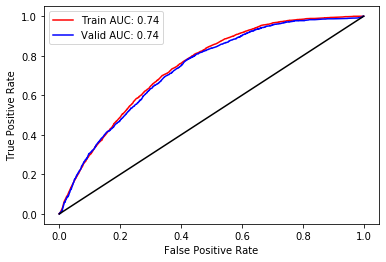

In [51]:
model = EasyEnsembleClassifier().fit(X_train_dem,y_train_dem)
y_train_preds = model.predict_proba(X_train_dem)[:,1]
y_valid_preds = model.predict_proba(X_valid_dem)[:,1]
check_overfitting(y_train_dem,y_valid_dem)

#### Oversampling

Train AUC:0.746
Valid AUC:0.742


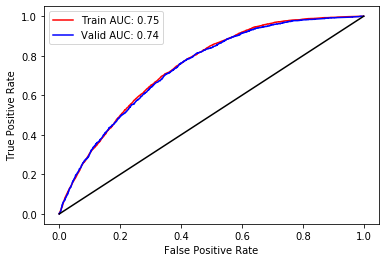

In [52]:
model=LogisticRegression().fit(X_ros,y_ros)
y_train_preds = model.predict_proba(X_train_dem)[:,1]
y_valid_preds = model.predict_proba(X_valid_dem)[:,1]
check_overfitting(y_train_dem,y_valid_dem)

#### Undersampling

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Train AUC:0.743
Valid AUC:0.739


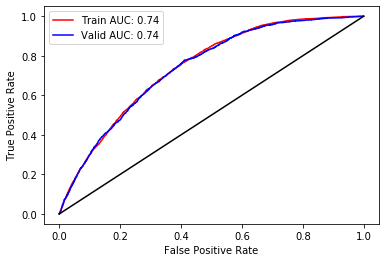

In [53]:
model=LinearDiscriminantAnalysis().fit(X_rus,y_rus)
y_train_preds = model.predict_proba(X_train_dem)[:,1]
y_valid_preds = model.predict_proba(X_valid_dem)[:,1]
check_overfitting(y_train_dem,y_valid_dem)

## Model using only treatment information

In [54]:
drg.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [55]:
merged_diag_adm_patient.columns

Index(['SUBJECT_ID', 'HADM_ID', 'RELIGION', 'LANGUAGE', 'ADMITTIME',
       'DISCHTIME', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY', 'DEATHTIME',
       'mortality_period', 'LABEL', 'DOB', 'Age'],
      dtype='object')

In [56]:
#Considering DRG codes only for diseases of the circulatory system
drg_sub=drg.loc[(drg.DRG_CODE>=215) & (drg.DRG_CODE<=320)]
merged_dia_drg= pd.merge(merged_diag_adm_patient[['SUBJECT_ID','HADM_ID','LABEL']],
                       drg_sub[['SUBJECT_ID','HADM_ID','DRG_CODE']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
X_drg=merged_dia_drg[['SUBJECT_ID','HADM_ID','DRG_CODE','LABEL']]
X_drg = X_drg.loc[~np.isnan(X_drg['DRG_CODE'])]
X_drg_dummies=pd.get_dummies(X_drg['DRG_CODE'])
y_drg=X_drg['LABEL']
print("The DRG table is of size: ",X_drg_dummies.shape)


The DRG table is of size:  (9695, 99)


In [57]:
X_train_drg, X_valid_drg, y_train_drg, y_valid_drg = train_test_split(X_drg_dummies, y_drg, test_size=0.33, random_state=42,stratify=y_drg)

In [58]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X_train_drg, y_train_drg)
print(classification_report(y_valid_drg,clf.predict(X_valid_drg)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3017
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3200
   macro avg       0.47      0.50      0.49      3200
weighted avg       0.89      0.94      0.92      3200



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Model is suffering from imbalance. So trying different sampling techniques

### Undersampling using only Treatment data


In [59]:
X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus=undersampling(X_train_drg,y_train_drg)
undersampling_results(X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus,X_valid_drg,y_valid_drg)


REDN done
EDN done
ALLKNN done
TMK done
IHT done
NM done
NCR done
OSS done
RUS done
Repeated Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 60.1885%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.91      0.29      0.93      0.51      0.28      3017
          1       0.17      0.29      0.91      0.21      0.51      0.25       183

avg / total       0.91      0.88      0.33      0.89      0.51      0.28      3200

DecisionTreeClassifier
****Results****
AUC: 59.4683%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.92      0.27      0.93      0.50      0.27      3017
          1       0.17      0.27      0.92      0.21      0.50      0.23       183

avg / total       0.91      0.88      0.31      0.89      0.50      0.26      3200

RandomForestClassifier
****Results****
AUC: 60.1

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 59.9153%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.91      0.28      0.93      0.51      0.28      3017
          1       0.17      0.28      0.91      0.21      0.51      0.24       183

avg / total       0.91      0.88      0.32      0.89      0.51      0.27      3200

DecisionTreeClassifier
****Results****
AUC: 59.9570%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.92      0.28      0.94      0.51      0.27      3017
          1       0.18      0.28      0.92      0.22      0.51      0.24       183

avg / total       0.91      0.88      0.32      0.90      0.51      0.27      3200

RandomForestClassifier
****Results****
AUC: 59.9153%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 57.7300%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.93      0.23      0.94      0.46      0.23      3017
          1       0.16      0.23      0.93      0.19      0.46      0.20       183

avg / total       0.91      0.89      0.27      0.90      0.46      0.23      3200

DecisionTreeClassifier
****Results****
AUC: 57.7300%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.93      0.23      0.94      0.46      0.23      3017
          1       0.16      0.23      0.93      0.19      0.46      0.20       183

avg / total       0.91      0.89      0.27      0.90      0.46      0.23      3200

RandomForestClassifier
****Results****
AUC: 57.7300%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 57.4012%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.98      0.16      0.97      0.40      0.17      3017
          1       0.38      0.16      0.98      0.23      0.40      0.15       183

avg / total       0.92      0.94      0.21      0.93      0.40      0.17      3200

DecisionTreeClassifier
****Results****
AUC: 54.5619%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.09      0.97      0.30      0.10      3017
          1       0.77      0.09      1.00      0.17      0.30      0.08       183

avg / total       0.94      0.95      0.14      0.93      0.30      0.10      3200

RandomForestClassifier
****Results****
AUC: 54.5454%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 59.0523%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.27      0.91      0.42      0.49      0.23      3017
          1       0.07      0.91      0.27      0.13      0.49      0.26       183

avg / total       0.93      0.31      0.88      0.40      0.49      0.23      3200

DecisionTreeClassifier
****Results****
AUC: 67.5879%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.65      0.70      0.78      0.68      0.45      3017
          1       0.11      0.70      0.65      0.19      0.68      0.46       183

avg / total       0.92      0.66      0.70      0.75      0.68      0.45      3200

RandomForestClassifier
****Results****
AUC: 59.0523%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.27      0.91      0.4

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 47.7290%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.74      0.21      0.83      0.40      0.17      3017
          1       0.05      0.21      0.74      0.08      0.40      0.15       183

avg / total       0.89      0.71      0.24      0.79      0.40      0.17      3200

DecisionTreeClassifier
****Results****
AUC: 56.0366%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.42      0.70      0.59      0.54      0.29      3017
          1       0.07      0.70      0.42      0.12      0.54      0.30       183

avg / total       0.91      0.44      0.68      0.56      0.54      0.29      3200

RandomForestClassifier
****Results****
AUC: 56.0366%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.42      0.70      0.5

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 58.7252%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.97      0.21      0.96      0.45      0.22      3017
          1       0.28      0.21      0.97      0.24      0.45      0.19       183

avg / total       0.91      0.92      0.25      0.92      0.45      0.21      3200

DecisionTreeClassifier
****Results****
AUC: 59.2717%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.97      0.22      0.96      0.46      0.23      3017
          1       0.29      0.22      0.97      0.25      0.46      0.20       183

avg / total       0.92      0.92      0.26      0.92      0.46      0.23      3200

RandomForestClassifier
****Results****
AUC: 59.4952%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.97      0.22      0.9

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 55.1079%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.99      0.11      0.97      0.34      0.12      3017
          1       0.36      0.11      0.99      0.17      0.34      0.10       183

avg / total       0.91      0.94      0.16      0.92      0.34      0.12      3200

DecisionTreeClassifier
****Results****
AUC: 55.1079%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.99      0.11      0.97      0.34      0.12      3017
          1       0.36      0.11      0.99      0.17      0.34      0.10       183

avg / total       0.91      0.94      0.16      0.92      0.34      0.12      3200

RandomForestClassifier
****Results****
AUC: 55.0914%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 58.4601%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.96      0.21      0.96      0.45      0.21      3017
          1       0.25      0.21      0.96      0.23      0.45      0.18       183

avg / total       0.91      0.92      0.25      0.92      0.45      0.21      3200

DecisionTreeClassifier
****Results****
AUC: 69.0248%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.76      0.62      0.85      0.69      0.48      3017
          1       0.14      0.62      0.76      0.22      0.69      0.46       183

avg / total       0.92      0.75      0.63      0.82      0.69      0.48      3200

RandomForestClassifier
****Results****
AUC: 71.0744%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.67      0.75      0.8

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Oversampling using only Treatment data

In [60]:
X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote=oversampling(X_train_drg,y_train_drg)
oversampling_results(X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote,X_valid_drg,y_valid_drg)

SMOTE done
ROS done
ADASYN done
SMOTESVM done
Borderline SMOTE done
SMOTEresults 

KNeighborsClassifier
****Results****
AUC: 61.3907%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.95      0.27      0.96      0.51      0.28      3017
          1       0.27      0.27      0.95      0.27      0.51      0.24       183

avg / total       0.92      0.92      0.31      0.92      0.51      0.28      3200

DecisionTreeClassifier
****Results****
AUC: 68.3467%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.78      0.58      0.87      0.68      0.47      3017
          1       0.14      0.58      0.78      0.23      0.68      0.45       183

avg / total       0.92      0.77      0.60      0.83      0.68      0.47      3200

RandomForestClassifier
****Results****
AUC: 71.3678%
Classification report: 
                

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression
****Results****
AUC: 70.0845%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.76      0.64      0.85      0.70      0.49      3017
          1       0.14      0.64      0.76      0.23      0.70      0.48       183

avg / total       0.92      0.76      0.65      0.82      0.70      0.49      3200



/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 60.8387%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.42      0.80      0.59      0.58      0.32      3017
          1       0.08      0.80      0.42      0.14      0.58      0.35       183

avg / total       0.92      0.44      0.78      0.56      0.58      0.32      3200

ROS results 

KNeighborsClassifier
****Results****
AUC: 58.0377%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.96      0.20      0.96      0.44      0.21      3017
          1       0.23      0.20      0.96      0.21      0.44      0.18       183

avg / total       0.91      0.92      0.25      0.91      0.44      0.21      3200

DecisionTreeClassifier
****Results****
AUC: 69.2241%
Classification report: 
                    pre       rec       spe        f1       geo       iba       s

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 71.3821%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.71      0.72      0.82      0.71      0.51      3017
          1       0.13      0.72      0.71      0.22      0.71      0.51       183

avg / total       0.93      0.71      0.72      0.79      0.71      0.51      3200

ADASYN results 

KNeighborsClassifier
****Results****
AUC: 55.0909%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.98      0.13      0.96      0.35      0.13      3017
          1       0.24      0.13      0.98      0.17      0.35      0.11       183

avg / total       0.91      0.93      0.17      0.92      0.35      0.13      3200

DecisionTreeClassifier
****Results****
AUC: 67.5524%
Classification report: 
                    pre       rec       spe        f1       geo       iba     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LogisticRegression
****Results****
AUC: 69.4969%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.77      0.62      0.86      0.69      0.48      3017
          1       0.14      0.62      0.77      0.23      0.69      0.47       183

avg / total       0.92      0.76      0.63      0.82      0.69      0.48      3200

LinearDiscriminantAnalysis
****Results****
AUC: 68.8927%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.77      0.61      0.86      0.68      0.48      3017
          1       0.14      0.61      0.77      0.23      0.68      0.46       183

avg / total       0.92      0.76      0.62      0.82      0.68      0.47      3200

SMOTESVM results 

KNeighborsClassifier
****Results****
AUC: 56.0768%
Classification report: 
                    pre       rec       spe        f1       geo       iba       

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LogisticRegression
****Results****
AUC: 63.6329%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.92      0.36      0.94      0.57      0.34      3017
          1       0.21      0.36      0.92      0.26      0.57      0.31       183

avg / total       0.92      0.89      0.39      0.90      0.57      0.34      3200

LinearDiscriminantAnalysis
****Results****
AUC: 60.2945%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.47      0.73      0.64      0.59      0.34      3017
          1       0.08      0.73      0.47      0.14      0.59      0.36       183

avg / total       0.92      0.49      0.72      0.61      0.59      0.34      3200

Borderline SMOTE results 

KNeighborsClassifier
****Results****
AUC: 57.3757%
Classification report: 
                    pre       rec       spe        f1       geo       ib

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Ensemble technique using only Treatment data

In [61]:
ensemble(X_train_drg,y_train_drg,X_valid_drg,y_valid_drg)

BBC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.72      0.70      0.83      0.71      0.51      3017
          1       0.13      0.70      0.72      0.23      0.71      0.51       183

avg / total       0.93      0.72      0.71      0.80      0.71      0.51      3200
   0.7149051549416694
BRF
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.72      0.69      0.83      0.71      0.50      3017
          1       0.13      0.69      0.72      0.22      0.71      0.50       183

avg / total       0.93      0.72      0.69      0.80      0.71      0.50      3200
   0.7063769785423583
EEC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.69      0.76      0.81      0.72      0.52      3017
          1       0.13      0.76      0.69      0.22      0.72      0.53       183

avg / total       0.93   

### Check to see whether overfitting has happened in case of undersampling using the best classifer

Train AUC:0.807
Valid AUC:0.795


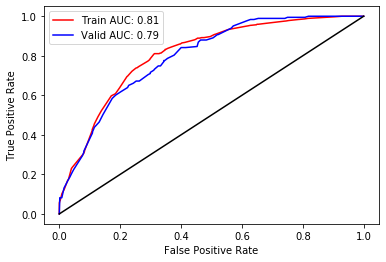

In [62]:
model=RandomForestClassifier().fit(X_rus,y_rus)
y_train_preds = model.predict_proba(X_train_drg)[:,1]
y_valid_preds = model.predict_proba(X_valid_drg)[:,1]
check_overfitting(y_train_drg,y_valid_drg)

### Check to see whether overfitting has happened in case of oversampling using the best classifier

Train AUC:0.815
Valid AUC:0.791


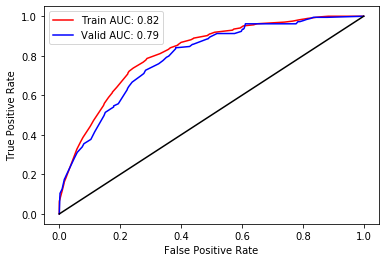

In [63]:
model=RandomForestClassifier().fit(X_sm,y_sm)
y_train_preds = model.predict_proba(X_train_drg)[:,1]
y_valid_preds = model.predict_proba(X_valid_drg)[:,1]
check_overfitting(y_train_drg,y_valid_drg)

### Check to see whether overfitting has happened in case of ensemble technique using the best classifier

Train AUC:0.822
Valid AUC:0.795


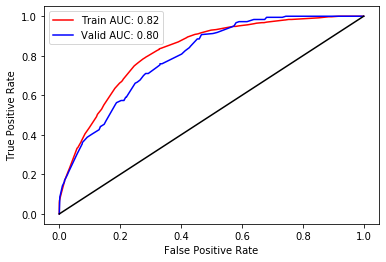

In [64]:
model=BalancedBaggingClassifier().fit(X_train_drg,y_train_drg)
y_train_preds = model.predict_proba(X_train_drg)[:,1]
y_valid_preds = model.predict_proba(X_valid_drg)[:,1]
check_overfitting(y_train_drg,y_valid_drg)

### Model using lab measurements only

In [65]:
lab.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12,-1,-1.00,mEq/L,NaN


In [66]:
vitals={50882: 'bicarbonate', 50903:'Cholesterol Ratio',50906:'LDL Cholesterol',50904:'HDL Cholesterol',50907:'Total Cholesterol',51000:'Triglycerides',50861:'Alanine Aminotransferase',50878:'Aspartate Aminotransferase',51241:'Alkaline phosphatase',50862:'Albumin',51464:'Bilirubin',51006:'BUN',50912:'Creatinine',50927:'Gamma Glutamyltransferase',50954:'Lactate Dehydrogenase (LD)',51102:'Total Protein, Urine',50889:'C-Reactive Protein',50910:'Creatine Kinase',50911:'Creatine Phosphokinase-MB',50909:'Cortisol',50945:'Homocysteine',51002:'Troponin I',51003:'Troponin T',51029:'Calcium',51030:'Chloride',51041:'Potassium',51042:'Sodium',50931:'Glucose',51221: 'hematocrit', 51222: 'hemoglobin',51300:'WBC_count'}

In [67]:
adm_id = merged_diag_adm_patient.HADM_ID.tolist()
lab_events=lab[lab['HADM_ID'].isin(adm_id)]
lab_events_1=lab_events[lab_events['ITEMID'].isin(vitals.keys())]
lab_events_1=lab_events_1.groupby('HADM_ID')

In [68]:
# Prepare joining copy of patient vitals
patient_vitals = merged_diag_adm_patient[['HADM_ID']].copy()
for value in vitals.values():
    patient_vitals[value] = np.nan
    
patient_vitals = patient_vitals.set_index('HADM_ID')

In [69]:
def resp_adjust(value):
    return max([int(x) for x in value.split('/') if x.isdigit()])
aday = pd.Timedelta('1 days')
# Each hospital stay, think of it as an individual patient (though technically not true)
for HADM_ID, group in lab_events_1:
    sub_groups = group.groupby('ITEMID')
    admittance_time = merged_diag_adm_patient.loc[merged_diag_adm_patient.HADM_ID==HADM_ID]['ADMITTIME'].values[0]
    # Each lab item type
    for lab_item, sub_group in sub_groups:
        day_results = sub_group[((sub_group.CHARTTIME - admittance_time) < aday)]
        # Unfortunate special case: If dirty respitory rate value, clean         
        if lab_item == 50827:
            cleaned_resp = map(resp_adjust, day_results['value'])
            mean =  np.mean(cleaned_resp)
        else:
            mean = day_results['VALUENUM'].values.mean()
        patient_vitals.set_value(HADM_ID, vitals[lab_item], mean)


/home/shayantan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/home/shayantan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [70]:
patient_vitals.head(3)

,bicarbonate,Cholesterol Ratio,LDL Cholesterol,HDL Cholesterol,Total Cholesterol,Triglycerides,Alanine Aminotransferase,Aspartate Aminotransferase,Alkaline phosphatase,Albumin,...,Troponin I,Troponin T,Calcium,Chloride,Potassium,Sodium,Glucose,hematocrit,hemoglobin,WBC_count
HADM_ID,,,,,,,,,,,,,,,,,,,,,
165315,28.0,NaN,NaN,NaN,NaN,NaN,19.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,102.0,35.900,12.2,NaN
152223,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.975,7.9,NaN
124321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
patient_vitals.shape

(56323, 31)

In [72]:
from fancyimpute import KNN
X_filled_knn = KNN(k=3).fit_transform(patient_vitals) 

Imputing row 1/56323 with 23 missing, elapsed time: 1162.680
Imputing row 101/56323 with 21 missing, elapsed time: 1163.303
Imputing row 201/56323 with 23 missing, elapsed time: 1163.721
Imputing row 301/56323 with 24 missing, elapsed time: 1164.157
Imputing row 401/56323 with 22 missing, elapsed time: 1164.672
Imputing row 501/56323 with 24 missing, elapsed time: 1165.166
Imputing row 601/56323 with 29 missing, elapsed time: 1165.680
Imputing row 701/56323 with 25 missing, elapsed time: 1166.092
Imputing row 801/56323 with 22 missing, elapsed time: 1166.468
Imputing row 901/56323 with 18 missing, elapsed time: 1167.102
Imputing row 1001/56323 with 29 missing, elapsed time: 1167.488
Imputing row 1101/56323 with 23 missing, elapsed time: 1167.853
Imputing row 1201/56323 with 31 missing, elapsed time: 1168.305
Imputing row 1301/56323 with 25 missing, elapsed time: 1169.363
Imputing row 1401/56323 with 22 missing, elapsed time: 1169.835
Imputing row 1501/56323 with 21 missing, elapsed tim

In [73]:
patient_vitals_imputed=pd.DataFrame(X_filled_knn,columns=patient_vitals.columns, index=patient_vitals.index)

In [74]:
admission_lab=merged_diag_adm_patient.merge(patient_vitals_imputed, on='HADM_ID')

In [75]:
X_lab=admission_lab[['bicarbonate',
       'Cholesterol Ratio', 'LDL Cholesterol', 'HDL Cholesterol',
       'Total Cholesterol', 'Triglycerides', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Alkaline phosphatase', 'Albumin',
       'Bilirubin', 'BUN', 'Creatinine', 'Gamma Glutamyltransferase',
       'Lactate Dehydrogenase (LD)', 'Total Protein, Urine',
       'C-Reactive Protein', 'Creatine Kinase', 'Creatine Phosphokinase-MB',
       'Cortisol', 'Homocysteine', 'Troponin I', 'Troponin T', 'Calcium',
       'Chloride', 'Potassium', 'Sodium', 'Glucose', 'hematocrit',
       'hemoglobin', 'WBC_count']]
y_lab=admission_lab['LABEL']

In [205]:
lab_meas=admission_lab[['bicarbonate',
       'Cholesterol Ratio', 'LDL Cholesterol', 'HDL Cholesterol',
       'Total Cholesterol', 'Triglycerides', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Alkaline phosphatase', 'Albumin',
       'Bilirubin', 'BUN', 'Creatinine', 'Gamma Glutamyltransferase',
       'Lactate Dehydrogenase (LD)', 'Total Protein, Urine',
       'C-Reactive Protein', 'Creatine Kinase', 'Creatine Phosphokinase-MB',
       'Cortisol', 'Homocysteine', 'Troponin I', 'Troponin T', 'Calcium',
       'Chloride', 'Potassium', 'Sodium', 'Glucose', 'hematocrit',
       'hemoglobin', 'WBC_count','LABEL']]

                            bicarbonate  Cholesterol Ratio  LDL Cholesterol  \
bicarbonate                    1.000000           0.608157         0.621262   
Cholesterol Ratio              0.608157           1.000000         0.581242   
LDL Cholesterol                0.621262           0.581242         1.000000   
HDL Cholesterol                0.703464           0.362493         0.620816   
Total Cholesterol              0.713818           0.737465         0.705171   
Triglycerides                  0.279218           0.426981         0.220822   
Alanine Aminotransferase       0.037754           0.051327         0.072468   
Aspartate Aminotransferase     0.021324           0.050832         0.068066   
Alkaline phosphatase                NaN                NaN              NaN   
Albumin                        0.727767           0.584590         0.689225   
Bilirubin                           NaN                NaN              NaN   
BUN                            0.204794           0.

<Figure size 1440x1440 with 0 Axes>

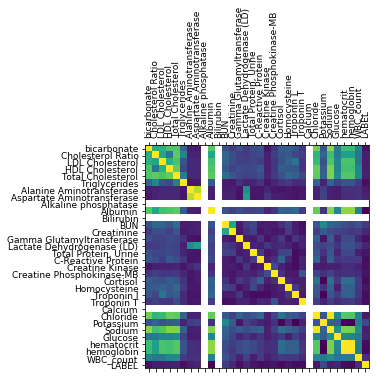

In [211]:
plt.figure(figsize=(20,20))
plt.matshow(lab_meas.corr())
print(lab_meas.corr())
plt.xticks(range(lab_meas.shape[1]),lab_meas.columns, fontsize=9, rotation=90)
plt.yticks(range(lab_meas.shape[1]),lab_meas.columns, fontsize=9)
plt.show()

In [76]:
X_train_lab, X_valid_lab, y_train_lab, y_valid_lab = train_test_split(X_lab, y_lab, test_size=0.33, random_state=42,stratify=y_lab)
scaler = MinMaxScaler()
X_train_lab_scaled= pd.DataFrame(scaler.fit_transform(X_train_lab),columns = X_train_lab.columns)
X_test_lab_selected=pd.DataFrame(scaler.transform(X_valid_lab),columns = X_valid_lab.columns)

### Undersampling using lab measurements data

In [77]:
X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus=undersampling(X_train_lab_scaled,y_train_lab)
undersampling_results(X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus,X_test_lab_selected,y_valid_lab)


REDN done
EDN done
ALLKNN done
TMK done
IHT done
NM done
NCR done
OSS done
RUS done
Repeated Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 57.8709%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.90      0.26      0.91      0.48      0.25     16971
          1       0.19      0.26      0.90      0.22      0.48      0.22      1617

avg / total       0.86      0.84      0.32      0.85      0.48      0.25     18588

DecisionTreeClassifier
****Results****
AUC: 59.0337%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.88      0.30      0.90      0.52      0.28     16971
          1       0.19      0.30      0.88      0.23      0.52      0.25      1617

avg / total       0.87      0.83      0.35      0.85      0.52      0.28     18588

RandomForestClassifier
****Results****
AUC: 58.1

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 59.8580%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.93      0.27      0.93      0.50      0.27     16971
          1       0.26      0.27      0.93      0.27      0.50      0.23      1617

avg / total       0.87      0.87      0.33      0.87      0.50      0.26     18588

Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 56.1476%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.94      0.18      0.93      0.42      0.19     16971
          1       0.22      0.18      0.94      0.20      0.42      0.16      1617

avg / total       0.86      0.87      0.25      0.87      0.42      0.18     18588

DecisionTreeClassifier
****Results****
AUC: 57.5354%
Classification report: 
                    pre       rec       spe        f1       

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 56.7490%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.17      0.95      0.40      0.17     16971
          1       0.33      0.17      0.97      0.22      0.40      0.15      1617

avg / total       0.87      0.90      0.24      0.88      0.40      0.17     18588

ALL k-Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 56.9483%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.92      0.22      0.92      0.45      0.21     16971
          1       0.21      0.22      0.92      0.21      0.45      0.18      1617

avg / total       0.86      0.86      0.28      0.86      0.45      0.21     18588

DecisionTreeClassifier
****Results****
AUC: 59.2507%
Classification report: 
                    pre       rec       spe        f1       g

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 53.7762%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.10      0.94      0.32      0.11     16971
          1       0.26      0.10      0.97      0.15      0.32      0.09      1617

avg / total       0.86      0.90      0.18      0.88      0.32      0.11     18588

DecisionTreeClassifier
****Results****
AUC: 54.7680%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.94      0.15      0.93      0.38      0.15     16971
          1       0.20      0.15      0.94      0.17      0.38      0.13      1617

avg / total       0.86      0.87      0.22      0.87      0.38      0.15     18588

RandomForestClassifier
****Results****
AUC: 51.6830%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 62.5874%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.44      0.81      0.61      0.60      0.34     16971
          1       0.12      0.81      0.44      0.21      0.60      0.37      1617

avg / total       0.89      0.47      0.78      0.57      0.60      0.35     18588

DecisionTreeClassifier
****Results****
AUC: 61.0940%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.36      0.86      0.52      0.56      0.29     16971
          1       0.11      0.86      0.36      0.20      0.56      0.32      1617

avg / total       0.89      0.40      0.82      0.49      0.56      0.30     18588

RandomForestClassifier
****Results****
AUC: 62.0899%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 53.8681%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.13      0.94      0.23      0.36      0.12     16971
          1       0.09      0.94      0.13      0.17      0.36      0.14      1617

avg / total       0.89      0.20      0.87      0.23      0.36      0.12     18588

DecisionTreeClassifier
****Results****
AUC: 53.7798%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.13      0.94      0.23      0.35      0.12     16971
          1       0.09      0.94      0.13      0.17      0.35      0.14      1617

avg / total       0.89      0.20      0.87      0.23      0.35      0.12     18588

RandomForestClassifier
****Results****
AUC: 52.7335%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.09      0.96      0.1

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 52.7217%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.09      0.96      0.17      0.30      0.08     16971
          1       0.09      0.96      0.09      0.17      0.30      0.10      1617

avg / total       0.89      0.17      0.89      0.17      0.30      0.08     18588

Neighborhood cleaning rule results 

KNeighborsClassifier
****Results****
AUC: 56.5318%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.94      0.19      0.93      0.43      0.20     16971
          1       0.22      0.19      0.94      0.21      0.43      0.17      1617

avg / total       0.86      0.87      0.26      0.87      0.43      0.19     18588

DecisionTreeClassifier
****Results****
AUC: 56.5755%
Classification report: 
                    pre       rec       spe        f1     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 53.7762%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.10      0.94      0.32      0.11     16971
          1       0.26      0.10      0.97      0.15      0.32      0.09      1617

avg / total       0.86      0.90      0.18      0.88      0.32      0.11     18588

DecisionTreeClassifier
****Results****
AUC: 54.8637%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.94      0.15      0.93      0.38      0.16     16971
          1       0.21      0.15      0.94      0.18      0.38      0.13      1617

avg / total       0.86      0.88      0.22      0.87      0.38      0.15     18588

RandomForestClassifier
****Results****
AUC: 51.6830%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 61.5598%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.65      0.59      0.77      0.61      0.38     16971
          1       0.14      0.59      0.65      0.22      0.61      0.38      1617

avg / total       0.87      0.64      0.59      0.72      0.61      0.38     18588

DecisionTreeClassifier
****Results****
AUC: 61.0986%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.63      0.59      0.76      0.61      0.37     16971
          1       0.13      0.59      0.63      0.22      0.61      0.37      1617

avg / total       0.87      0.63      0.59      0.71      0.61      0.37     18588

RandomForestClassifier
****Results****
AUC: 67.7279%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.65      0.70      0.7

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Oversampling using lab measurements data

In [78]:
X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote=oversampling(X_train_lab_scaled,y_train_lab)
oversampling_results(X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote,X_test_lab_selected,y_valid_lab)

SMOTE done
ROS done
ADASYN done
SMOTESVM done
Borderline SMOTE done
SMOTEresults 

KNeighborsClassifier
****Results****
AUC: 58.5119%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.78      0.39      0.85      0.55      0.31     16971
          1       0.15      0.39      0.78      0.21      0.55      0.29      1617

avg / total       0.86      0.75      0.42      0.80      0.55      0.31     18588

DecisionTreeClassifier
****Results****
AUC: 57.7767%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.83      0.32      0.88      0.52      0.28     16971
          1       0.16      0.32      0.83      0.21      0.52      0.26      1617

avg / total       0.86      0.79      0.37      0.82      0.52      0.28     18588

RandomForestClassifier
****Results****
AUC: 58.1958%
Classification report: 
                

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 64.8385%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.69      0.60      0.80      0.65      0.42     16971
          1       0.16      0.60      0.69      0.25      0.65      0.41      1617

avg / total       0.88      0.69      0.61      0.75      0.65      0.42     18588

ROS results 

KNeighborsClassifier
****Results****
AUC: 56.0533%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.87      0.25      0.90      0.47      0.23     16971
          1       0.15      0.25      0.87      0.19      0.47      0.21      1617

avg / total       0.86      0.81      0.31      0.83      0.47      0.23     18588

DecisionTreeClassifier
****Results****
AUC: 59.0625%
Classification report: 
                    pre       rec       spe        f1       geo       iba       s

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 65.0771%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.70      0.60      0.81      0.65      0.43     16971
          1       0.16      0.60      0.70      0.25      0.65      0.42      1617

avg / total       0.88      0.69      0.61      0.76      0.65      0.42     18588

ADASYN results 

KNeighborsClassifier
****Results****
AUC: 58.5368%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.78      0.39      0.85      0.55      0.32     16971
          1       0.14      0.39      0.78      0.21      0.55      0.29      1617

avg / total       0.86      0.75      0.42      0.79      0.55      0.31     18588

DecisionTreeClassifier
****Results****
AUC: 58.8826%
Classification report: 
                    pre       rec       spe        f1       geo       iba     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 64.7085%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.67      0.62      0.79      0.65      0.42     16971
          1       0.15      0.62      0.67      0.25      0.65      0.42      1617

avg / total       0.88      0.67      0.62      0.74      0.65      0.42     18588

SMOTESVM results 

KNeighborsClassifier
****Results****
AUC: 58.1831%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.83      0.33      0.88      0.53      0.29     16971
          1       0.16      0.33      0.83      0.21      0.53      0.26      1617

avg / total       0.86      0.79      0.38      0.82      0.53      0.29     18588

DecisionTreeClassifier
****Results****
AUC: 59.1651%
Classification report: 
                    pre       rec       spe        f1       geo       iba   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 63.7029%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.81      0.46      0.87      0.61      0.39     16971
          1       0.19      0.46      0.81      0.27      0.61      0.36      1617

avg / total       0.88      0.78      0.49      0.82      0.61      0.39     18588

Borderline SMOTE results 

KNeighborsClassifier
****Results****
AUC: 59.0382%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.81      0.37      0.87      0.55      0.31     16971
          1       0.16      0.37      0.81      0.22      0.55      0.29      1617

avg / total       0.86      0.77      0.41      0.81      0.55      0.31     18588

DecisionTreeClassifier
****Results****
AUC: 59.4121%
Classification report: 
                    pre       rec       spe        f1       geo     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Ensemble techniques using lab measurement data

In [79]:
ensemble(X_train_lab_scaled,y_train_lab,X_test_lab_selected,y_valid_lab)

BBC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.82      0.43      0.88      0.59      0.37     16971
          1       0.19      0.43      0.82      0.26      0.59      0.34      1617

avg / total       0.87      0.79      0.46      0.82      0.59      0.36     18588
   0.6246181825615649
BRF
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.65      0.72      0.78      0.68      0.46     16971
          1       0.16      0.72      0.65      0.27      0.68      0.47      1617

avg / total       0.89      0.66      0.71      0.73      0.68      0.46     18588
   0.6842445625621969
EEC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.67      0.68      0.79      0.68      0.46     16971
          1       0.16      0.68      0.67      0.26      0.68      0.46      1617

avg / total       0.89   

### Check to see whether overfitting has happened in case of undersampling using the best classifer

Train AUC:0.692
Valid AUC:0.678


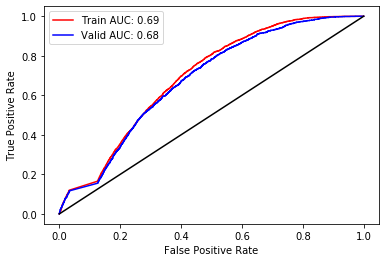

In [80]:
model=GradientBoostingClassifier().fit(X_iht,y_iht)
y_train_preds = model.predict_proba(X_train_lab_scaled)[:,1]
y_valid_preds = model.predict_proba(X_test_lab_selected)[:,1]
check_overfitting(y_train_lab,y_valid_lab)

### Check to see whether overfitting has happened in case of oversampling using the best classifer

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Train AUC:0.701
Valid AUC:0.708


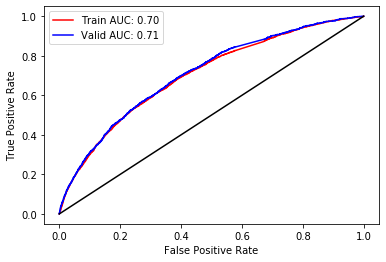

In [81]:
model=LinearDiscriminantAnalysis().fit(X_ada,y_ada)
y_train_preds = model.predict_proba(X_train_lab_scaled)[:,1]
y_valid_preds = model.predict_proba(X_test_lab_selected)[:,1]
check_overfitting(y_train_lab,y_valid_lab)

### Combining demographics, treatment and lab events

In [82]:
admission_lab.columns

Index(['SUBJECT_ID', 'HADM_ID', 'RELIGION', 'LANGUAGE', 'ADMITTIME',
       'DISCHTIME', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY', 'DEATHTIME',
       'mortality_period', 'LABEL', 'DOB', 'Age', 'bicarbonate',
       'Cholesterol Ratio', 'LDL Cholesterol', 'HDL Cholesterol',
       'Total Cholesterol', 'Triglycerides', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Alkaline phosphatase', 'Albumin',
       'Bilirubin', 'BUN', 'Creatinine', 'Gamma Glutamyltransferase',
       'Lactate Dehydrogenase (LD)', 'Total Protein, Urine',
       'C-Reactive Protein', 'Creatine Kinase', 'Creatine Phosphokinase-MB',
       'Cortisol', 'Homocysteine', 'Troponin I', 'Troponin T', 'Calcium',
       'Chloride', 'Potassium', 'Sodium', 'Glucose', 'hematocrit',
       'hemoglobin', 'WBC_count'],
      dtype='object')

In [83]:
X_drg.columns

Index(['SUBJECT_ID', 'HADM_ID', 'DRG_CODE', 'LABEL'], dtype='object')

In [84]:
admission_lab_drg=admission_lab.merge(X_drg, on='HADM_ID')

In [85]:
admission_lab_drg.columns

Index(['SUBJECT_ID_x', 'HADM_ID', 'RELIGION', 'LANGUAGE', 'ADMITTIME',
       'DISCHTIME', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY', 'DEATHTIME',
       'mortality_period', 'LABEL_x', 'DOB', 'Age', 'bicarbonate',
       'Cholesterol Ratio', 'LDL Cholesterol', 'HDL Cholesterol',
       'Total Cholesterol', 'Triglycerides', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Alkaline phosphatase', 'Albumin',
       'Bilirubin', 'BUN', 'Creatinine', 'Gamma Glutamyltransferase',
       'Lactate Dehydrogenase (LD)', 'Total Protein, Urine',
       'C-Reactive Protein', 'Creatine Kinase', 'Creatine Phosphokinase-MB',
       'Cortisol', 'Homocysteine', 'Troponin I', 'Troponin T', 'Calcium',
       'Chloride', 'Potassium', 'Sodium', 'Glucose', 'hematocrit',
       'hemoglobin', 'WBC_count', 'SUBJECT_ID_y', 'DRG_CODE', 'LABEL_y'],
      dtype='object')

In [86]:
X_combined=admission_lab_drg.drop(['SUBJECT_ID_x','HADM_ID','ADMITTIME','DISCHTIME','DEATHTIME','mortality_period','DOB','SUBJECT_ID_y','LABEL_y'],axis=1)

In [87]:
X_combined_dummies=pd.get_dummies(X_combined, prefix=['RELIGION', 'LANGUAGE','ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY','DRG_CODE'], columns=['RELIGION', 'LANGUAGE','ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY','DRG_CODE'])

In [90]:
X_combined_cont=X_combined_dummies[cols]

In [89]:
cols=['Age', 'bicarbonate',
       'Cholesterol Ratio', 'LDL Cholesterol', 'HDL Cholesterol',
       'Total Cholesterol', 'Triglycerides', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Alkaline phosphatase', 'Albumin',
       'Bilirubin', 'BUN', 'Creatinine', 'Gamma Glutamyltransferase',
       'Lactate Dehydrogenase (LD)', 'Total Protein, Urine',
       'C-Reactive Protein', 'Creatine Kinase', 'Creatine Phosphokinase-MB',
       'Cortisol', 'Homocysteine', 'Troponin I', 'Troponin T', 'Calcium',
       'Chloride', 'Potassium', 'Sodium', 'Glucose', 'hematocrit',
       'hemoglobin', 'WBC_count',]

In [91]:
X_combined_train=X_combined_dummies.drop('LABEL_x',axis=1)

In [92]:
y_combined_train=X_combined_dummies['LABEL_x']

In [93]:
X_combined_train_std=X_combined_train

In [94]:
X_train_comb, X_valid_comb, y_train_comb, y_valid_comb = train_test_split(X_combined_train,X_combined_dummies['LABEL_x'],test_size=0.33, random_state=42,stratify=X_combined_dummies['LABEL_x'])
scaler = MinMaxScaler()
X_train_comb_scaled= pd.DataFrame(scaler.fit_transform(X_train_comb),columns = X_train_comb.columns)
X_test_comb_selected=pd.DataFrame(scaler.transform(X_valid_comb),columns = X_valid_comb.columns)

### Undersampling using combined feature set

In [95]:
X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus=undersampling(X_train_comb_scaled,y_train_comb)
undersampling_results(X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus,X_test_comb_selected,y_valid_comb)


REDN done
EDN done
ALLKNN done
TMK done
IHT done
NM done
NCR done
OSS done
RUS done
Repeated Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 57.9644%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.94      0.22      0.95      0.45      0.22      3019
          1       0.18      0.22      0.94      0.20      0.45      0.19       183

avg / total       0.91      0.90      0.26      0.90      0.45      0.22      3202

DecisionTreeClassifier
****Results****
AUC: 63.7352%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.94      0.33      0.95      0.56      0.33      3019
          1       0.26      0.33      0.94      0.29      0.56      0.29       183

avg / total       0.92      0.91      0.37      0.91      0.56      0.33      3202

RandomForestClassifier
****Results****
AUC: 60.2

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 65.7803%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.94      0.37      0.95      0.59      0.37      3019
          1       0.29      0.37      0.94      0.32      0.59      0.33       183

avg / total       0.92      0.91      0.40      0.92      0.59      0.37      3202

Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 55.3152%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.96      0.14      0.96      0.37      0.15      3019
          1       0.19      0.14      0.96      0.16      0.37      0.13       183

avg / total       0.91      0.92      0.19      0.91      0.37      0.15      3202

DecisionTreeClassifier
****Results****
AUC: 65.6396%
Classification report: 
                    pre       rec       spe        f1       

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 65.1760%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.96      0.34      0.96      0.57      0.35      3019
          1       0.34      0.34      0.96      0.34      0.57      0.31       183

avg / total       0.92      0.92      0.38      0.92      0.57      0.35      3202

ALL k-Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 56.6812%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.95      0.18      0.95      0.41      0.19      3019
          1       0.19      0.18      0.95      0.18      0.41      0.16       183

avg / total       0.91      0.91      0.22      0.91      0.41      0.18      3202

DecisionTreeClassifier
****Results****
AUC: 62.9984%
Classification report: 
                    pre       rec       spe        f1       g

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 65.4160%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.95      0.36      0.95      0.58      0.36      3019
          1       0.29      0.36      0.95      0.32      0.58      0.32       183

avg / total       0.92      0.91      0.39      0.92      0.58      0.36      3202

Tomek links results 

KNeighborsClassifier
****Results****
AUC: 52.9308%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.98      0.08      0.96      0.27      0.08      3019
          1       0.21      0.08      0.98      0.11      0.27      0.07       183

avg / total       0.90      0.93      0.13      0.92      0.27      0.08      3202

DecisionTreeClassifier
****Results****
AUC: 60.0676%
Classification report: 
                    pre       rec       spe        f1       geo       iba

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 62.7006%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.98      0.27      0.97      0.52      0.29      3019
          1       0.46      0.27      0.98      0.34      0.52      0.25       183

avg / total       0.93      0.94      0.31      0.93      0.52      0.28      3202

Instance hardness threshold results 

KNeighborsClassifier
****Results****
AUC: 72.5427%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.71      0.74      0.82      0.73      0.52      3019
          1       0.13      0.74      0.71      0.23      0.73      0.53       183

avg / total       0.93      0.71      0.74      0.79      0.73      0.52      3202

DecisionTreeClassifier
****Results****
AUC: 72.7652%
Classification report: 
                    pre       rec       spe        f1    

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 52.2556%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.43      0.62      0.59      0.51      0.26      3019
          1       0.06      0.62      0.43      0.11      0.51      0.27       183

avg / total       0.90      0.44      0.61      0.56      0.51      0.26      3202

DecisionTreeClassifier
****Results****
AUC: 53.8695%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.36      0.72      0.52      0.51      0.25      3019
          1       0.06      0.72      0.36      0.12      0.51      0.27       183

avg / total       0.90      0.38      0.70      0.50      0.51      0.25      3202

RandomForestClassifier
****Results****
AUC: 58.1255%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.40      0.77      0.5

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC: 57.0207%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.95      0.19      0.95      0.42      0.19      3019
          1       0.20      0.19      0.95      0.19      0.42      0.16       183

avg / total       0.91      0.91      0.23      0.91      0.42      0.19      3202

DecisionTreeClassifier
****Results****
AUC: 61.7648%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.96      0.28      0.96      0.52      0.28      3019
          1       0.28      0.28      0.96      0.28      0.52      0.25       183

avg / total       0.92      0.92      0.32      0.92      0.52      0.28      3202

RandomForestClassifier
****Results****
AUC: 60.0762%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.20      0.9

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNeighborsClassifier
****Results****
AUC: 52.9474%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.98      0.08      0.96      0.27      0.08      3019
          1       0.21      0.08      0.98      0.11      0.27      0.07       183

avg / total       0.90      0.93      0.13      0.92      0.27      0.08      3202

DecisionTreeClassifier
****Results****
AUC: 60.1338%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.96      0.24      0.96      0.48      0.25      3019
          1       0.28      0.24      0.96      0.26      0.48      0.21       183

avg / total       0.92      0.92      0.28      0.92      0.48      0.25      3202

RandomForestClassifier
****Results****
AUC: 59.7864%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.98      0.27      0.97      0.52      0.29      3019
          1       0.46      0.27      0.98      0.34      0.52      0.25       183

avg / total       0.93      0.94      0.31      0.93      0.52      0.28      3202

Random Undersampler results 

KNeighborsClassifier
****Results****
AUC: 66.2831%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.68      0.65      0.80      0.66      0.44      3019
          1       0.11      0.65      0.68      0.19      0.66      0.44       183

avg / total       0.92      0.67      0.65      0.76      0.66      0.44      3202

DecisionTreeClassifier
****Results****
AUC: 67.0116%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.66     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Oversampling using combined feature set

In [96]:
X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote=oversampling(X_train_comb_scaled,y_train_comb)
oversampling_results(X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote,X_test_comb_selected,y_valid_comb)

SMOTE done
ROS done
ADASYN done
SMOTESVM done
Borderline SMOTE done
SMOTEresults 

KNeighborsClassifier
****Results****
AUC: 68.2961%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.81      0.56      0.88      0.67      0.46      3019
          1       0.15      0.56      0.81      0.24      0.67      0.44       183

avg / total       0.92      0.79      0.57      0.84      0.67      0.46      3202

DecisionTreeClassifier
****Results****
AUC: 68.6610%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.87      0.50      0.92      0.66      0.45      3019
          1       0.19      0.50      0.87      0.28      0.66      0.42       183

avg / total       0.92      0.85      0.52      0.88      0.66      0.45      3202

RandomForestClassifier
****Results****
AUC: 65.3666%
Classification report: 
                

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 76.8654%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.80      0.74      0.88      0.77      0.59      3019
          1       0.18      0.74      0.80      0.29      0.77      0.59       183

avg / total       0.93      0.80      0.74      0.85      0.77      0.59      3202

ROS results 

KNeighborsClassifier
****Results****
AUC: 62.6091%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.93      0.32      0.94      0.55      0.32      3019
          1       0.22      0.32      0.93      0.26      0.55      0.28       183

avg / total       0.92      0.90      0.36      0.90      0.55      0.32      3202

DecisionTreeClassifier
****Results****
AUC: 66.7735%
Classification report: 
                    pre       rec       spe        f1       geo       iba       s

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 75.3170%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.79      0.72      0.87      0.75      0.57      3019
          1       0.17      0.72      0.79      0.27      0.75      0.56       183

avg / total       0.93      0.78      0.72      0.84      0.75      0.57      3202

ADASYN results 

KNeighborsClassifier
****Results****
AUC: 68.3375%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.80      0.56      0.88      0.67      0.46      3019
          1       0.15      0.56      0.80      0.23      0.67      0.44       183

avg / total       0.92      0.79      0.58      0.84      0.67      0.46      3202

DecisionTreeClassifier
****Results****
AUC: 68.0400%
Classification report: 
                    pre       rec       spe        f1       geo       iba     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 76.9233%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.80      0.74      0.88      0.77      0.59      3019
          1       0.18      0.74      0.80      0.29      0.77      0.59       183

avg / total       0.94      0.79      0.75      0.84      0.77      0.59      3202

SMOTESVM results 

KNeighborsClassifier
****Results****
AUC: 67.7749%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.86      0.50      0.91      0.65      0.44      3019
          1       0.18      0.50      0.86      0.26      0.65      0.41       183

avg / total       0.92      0.84      0.52      0.87      0.65      0.44      3202

DecisionTreeClassifier
****Results****
AUC: 62.5263%
Classification report: 
                    pre       rec       spe        f1       geo       iba   

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
AUC: 71.5507%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.89      0.54      0.93      0.69      0.50      3019
          1       0.23      0.54      0.89      0.32      0.69      0.46       183

avg / total       0.93      0.87      0.56      0.89      0.69      0.50      3202

Borderline SMOTE results 

KNeighborsClassifier
****Results****
AUC: 68.6856%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.84      0.53      0.90      0.67      0.46      3019
          1       0.17      0.53      0.84      0.26      0.67      0.43       183

avg / total       0.92      0.83      0.55      0.86      0.67      0.46      3202

DecisionTreeClassifier
****Results****
AUC: 67.2702%
Classification report: 
                    pre       rec       spe        f1       geo     

/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Ensemble techniques using combined feature set

In [97]:
ensemble(X_train_comb_scaled,y_train_comb,X_test_comb_selected,y_valid_comb)

BBC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.82      0.58      0.89      0.69      0.49      3019
          1       0.17      0.58      0.82      0.26      0.69      0.47       183

avg / total       0.92      0.81      0.60      0.86      0.69      0.49      3202
   0.704406699283409
BRF
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.71      0.81      0.83      0.76      0.57      3019
          1       0.15      0.81      0.71      0.25      0.76      0.58       183

avg / total       0.94      0.72      0.81      0.79      0.76      0.57      3202
   0.7623539079454891
EEC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.73      0.81      0.84      0.77      0.59      3019
          1       0.15      0.81      0.73      0.26      0.77      0.60       183

avg / total       0.94    

Train AUC:0.951
Valid AUC:0.760


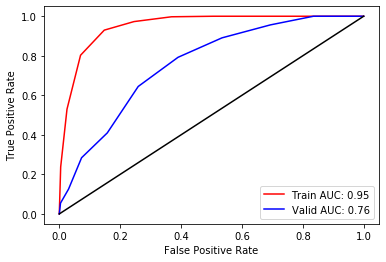

In [98]:
model=RandomForestClassifier().fit(X_rus,y_rus)
y_train_preds = model.predict_proba(X_train_comb_scaled)[:,1]
y_valid_preds = model.predict_proba(X_test_comb_selected)[:,1]
check_overfitting(y_train_comb,y_valid_comb)

Train AUC:0.899
Valid AUC:0.848


/home/shayantan/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


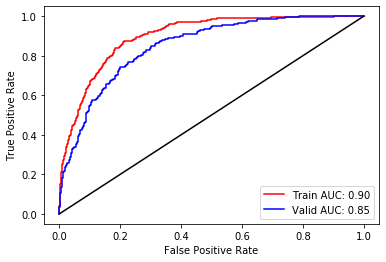

In [99]:
model=LinearDiscriminantAnalysis().fit(X_ada,y_ada)
y_train_preds = model.predict_proba(X_train_comb_scaled)[:,1]
y_valid_preds = model.predict_proba(X_test_comb_selected)[:,1]
check_overfitting(y_train_comb,y_valid_comb)

### Using clinical notes as features

In [100]:
note.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...


In [101]:
# filter to discharge summary
df_notes_dis_sum = note.loc[note.CATEGORY == 'Discharge summary']
#group the notes by SUBJECT and HADM ID
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [102]:
df_adm_notes = pd.merge(merged_diag_adm_patient[['SUBJECT_ID', 'HADM_ID','LABEL']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')

In [103]:
print('Fraction of missing notes:', df_adm_notes.TEXT.isnull().sum() / len(df_adm_notes))
print('Fraction notes with newlines:', df_adm_notes.TEXT.str.contains('\n').sum() / len(df_adm_notes))
print('Fraction notes with carriage returns:', df_adm_notes.TEXT.str.contains('\r').sum() / len(df_adm_notes))

Fraction of missing notes: 0.10956447632405944
Fraction notes with newlines: 0.8904355236759406
Fraction notes with carriage returns: 0.0


In [104]:
def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

In [105]:
df_adm_prep=preprocess_text(df_adm_notes)

In [106]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/shayantan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [233]:
import nltk
from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')
import string
print(string.punctuation)
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(max_features=500,
                      tokenizer = tokenizer_better,
                      stop_words=my_stop_words)
vect.fit(df_adm_prep.TEXT.values)
#vect = CountVectorizer(max_features = 500, 
                       #tokenizer = tokenizer_better, 
                       #stop_words = my_stop_words)
# this could take a while
#vect.fit(df_adm_prep.TEXT.values)
X_notes_tf = vect.transform(df_adm_prep.TEXT.values)
df1 = pd.DataFrame(X_notes_tf.toarray(), columns=vect.get_feature_names())


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [108]:
df1.head(3)

,abd,abdomen,abdominal,able,above,acetaminophen,activity,acute,admission,admitted,...,who,will,within,without,work,would,wound,x,year,years
0,0,0,1,1,0,0,0,0,2,0,...,2,0,1,1,1,0,0,0,2,1
1,0,1,0,0,1,0,0,0,2,1,...,0,0,0,1,0,0,0,0,2,0
2,1,1,0,1,0,1,9,2,4,1,...,0,6,1,2,1,0,3,7,0,2


In [109]:
X_train_note, X_valid_note, y_train_note, y_valid_note = train_test_split(df1,df_adm_prep['LABEL'],test_size=0.33, random_state=42,stratify=df_adm_prep['LABEL'])
scaler = MinMaxScaler()
X_train_note_scaled= pd.DataFrame(scaler.fit_transform(X_train_note),columns = X_train_note.columns)
X_test_note_selected=pd.DataFrame(scaler.transform(X_valid_note),columns = X_valid_note.columns)

### Undersampling using text features only

In [110]:
X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus=undersampling(X_train_note_scaled,y_train_note)
undersampling_results(X_redn,y_redn,X_edn,y_edn,X_allknn,y_allknn,X_tmk,y_tmk,X_iht,y_iht,X_ncr,y_ncr,X_nm,y_nm,X_oss,y_oss,X_rus,y_rus,X_test_note_selected,y_valid_note)


REDN done
EDN done
ALLKNN done
TMK done
IHT done
NM done
NCR done
OSS done
RUS done
Repeated Edited Nearest Neighbors results 

KNeighborsClassifier
****Results****
AUC: 87.1944%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.95      0.79      0.97      0.87      0.77     16970
          1       0.62      0.79      0.95      0.69      0.87      0.74      1617

avg / total       0.95      0.94      0.81      0.94      0.87      0.76     18587

DecisionTreeClassifier
****Results****
AUC: 86.1789%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.97      0.75      0.97      0.85      0.75     16970
          1       0.73      0.75      0.97      0.74      0.85      0.71      1617

avg / total       0.95      0.95      0.77      0.95      0.85      0.74     18587

RandomForestClassifier
****Results****
AUC: 89.2

### Oversampling using text features only

In [111]:
X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote=oversampling(X_train_note_scaled,y_train_note)
oversampling_results(X_sm,y_sm,X_ros,y_ros,X_ada,y_ada,X_smotesvm,y_smotesvm,X_bsmote,y_bsmote,X_test_note_selected,y_valid_note)

SMOTE done
ROS done
ADASYN done
SMOTESVM done
Borderline SMOTE done
SMOTEresults 

KNeighborsClassifier
****Results****
AUC: 81.1725%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.73      0.89      0.84      0.81      0.64     16970
          1       0.24      0.89      0.73      0.38      0.81      0.66      1617

avg / total       0.92      0.75      0.88      0.80      0.81      0.64     18587

DecisionTreeClassifier
****Results****
AUC: 85.2617%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.98      0.73      0.98      0.84      0.73     16970
          1       0.76      0.73      0.98      0.74      0.84      0.69      1617

avg / total       0.96      0.96      0.75      0.96      0.84      0.73     18587

RandomForestClassifier
****Results****
AUC: 88.5235%
Classification report: 
                

### Ensemble techniques using text feature only

In [112]:
ensemble(X_train_note_scaled,y_train_note,X_test_note_selected,y_valid_note)

BBC
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.93      0.92      0.90      0.80     16970
          1       0.40      0.93      0.86      0.56      0.90      0.81      1617

avg / total       0.94      0.87      0.93      0.89      0.90      0.80     18587
   0.8989116812418436
BRF
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.97      0.88      0.98      0.92      0.85     16970
          1       0.71      0.88      0.97      0.79      0.92      0.84      1617

avg / total       0.96      0.96      0.88      0.96      0.92      0.85     18587
   0.9208916276640833
EEC
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.86      0.97      0.93      0.92      0.83     16970
          1       0.40      0.97      0.86      0.57      0.92      0.85      1617

avg / total       0.95   

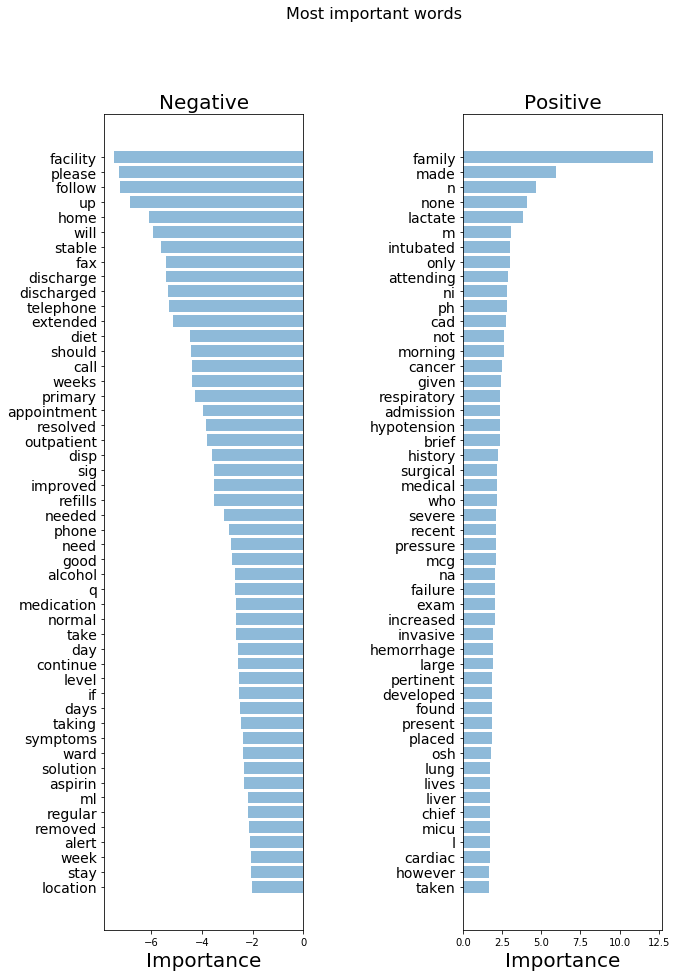

In [236]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 15))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

    
importance = get_most_important_features(vect, clf, 50)
    
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words")

In [234]:
clf=LogisticRegression().fit(df1,df_adm_prep['LABEL'])

Index(['Age', 'Potassium', 'DRG_CODE_283.0', 'Glucose', 'BUN', 'Albumin',
       'bicarbonate', 'Creatinine', 'Aspartate Aminotransferase', 'WBC_count',
       'Cortisol', 'Lactate Dehydrogenase (LD)', 'Sodium', 'Creatine Kinase',
       'Alanine Aminotransferase', 'Cholesterol Ratio', 'HDL Cholesterol',
       'hematocrit', 'Chloride', 'Troponin I', 'Troponin T', 'Homocysteine',
       'LDL Cholesterol', 'hemoglobin', 'Triglycerides',
       'Gamma Glutamyltransferase', 'Total Cholesterol',
       'Creatine Phosphokinase-MB', 'C-Reactive Protein',
       'Total Protein, Urine'],
      dtype='object')
[0.03806609 0.02896991 0.02625755 0.02388109 0.02569651 0.02349587
 0.02380514 0.02646906 0.02869306 0.         0.02908384 0.
 0.0292686  0.02876033 0.0235081  0.02744007 0.02296306 0.02320439
 0.02647632 0.02326164 0.02775325 0.02441121 0.02461801 0.02459512
 0.         0.02479903 0.03441656 0.02685148 0.03090219 0.02503789]
0) Age 0.03806609379777311
1) Potassium 0.03441656349765747
2) 

([<matplotlib.axis.XTick at 0x7fef56e9d898>,
 <a list of 229 Text xticklabel objects>)

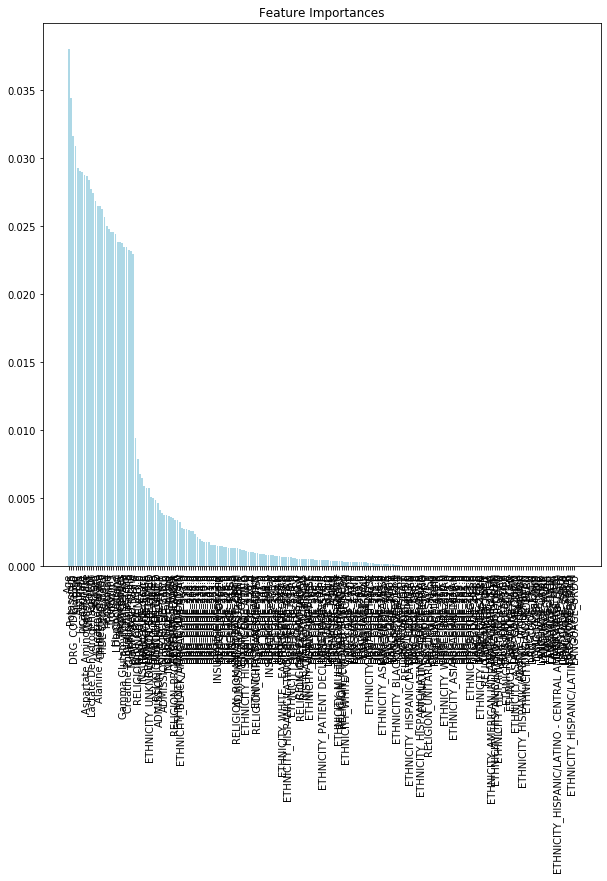

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
              "n_estimators": list(range(1,500)),
             }

forest = RandomForestClassifier(random_state=42)
rand_for = RandomizedSearchCV(forest, param_grid, scoring = 'accuracy', n_iter=1, random_state=42)
_ = rand_for.fit(X_combined_train,y_combined_train)
importances = rand_for.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
print(X_combined_train.columns[indices][0:30])
print(importances[0:30])
for f in range(X_combined_train.shape[1]):
    print("{}) {} {}".format(f, X_combined_train.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X_combined_train.shape[1]), importances[indices], color='lightblue')
plt.xticks(range(X_combined_train.shape[1]), X_combined_train.columns[indices], rotation=90)


In [137]:
y_train_dem.shape

(37736, 1)

In [142]:
X_d.columns

Index(['Age', 'RELIGION_7TH DAY ADVENTIST', 'RELIGION_BAPTIST',
       'RELIGION_BUDDHIST', 'RELIGION_CATHOLIC',
       'RELIGION_CHRISTIAN SCIENTIST', 'RELIGION_EPISCOPALIAN',
       'RELIGION_GREEK ORTHODOX', 'RELIGION_HEBREW', 'RELIGION_HINDU',
       ...
       'ETHNICITY_PATIENT DECLINED TO ANSWER', 'ETHNICITY_PORTUGUESE',
       'ETHNICITY_SOUTH AMERICAN', 'ETHNICITY_UNABLE TO OBTAIN',
       'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'ETHNICITY_WHITE',
       'ETHNICITY_WHITE - BRAZILIAN', 'ETHNICITY_WHITE - EASTERN EUROPEAN',
       'ETHNICITY_WHITE - OTHER EUROPEAN', 'ETHNICITY_WHITE - RUSSIAN'],
      dtype='object', length=142)

In [213]:
names=['Age', 'Potassium', 'DRG_CODE_283.0', 'Glucose', 'BUN', 'Albumin',
       'bicarbonate', 'Creatinine', 'Aspartate Aminotransferase', 'WBC_count',
       'Cortisol', 'Lactate Dehydrogenase (LD)', 'Sodium', 'Creatine Kinase',
       'Alanine Aminotransferase', 'Cholesterol Ratio', 'HDL Cholesterol',
       'hematocrit', 'Chloride', 'Troponin I', 'Troponin T', 'Homocysteine',
       'LDL Cholesterol', 'hemoglobin', 'Triglycerides',
       'Gamma Glutamyltransferase', 'Total Cholesterol',
       'Creatine Phosphokinase-MB', 'C-Reactive Protein',
       'Total Protein, Urine']

In [221]:
imp_combined=pd.DataFrame(list(zip(names,importances)),columns=['names','imp'])

In [227]:
imp_comb_sort=imp_combined.sort_values('imp',ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

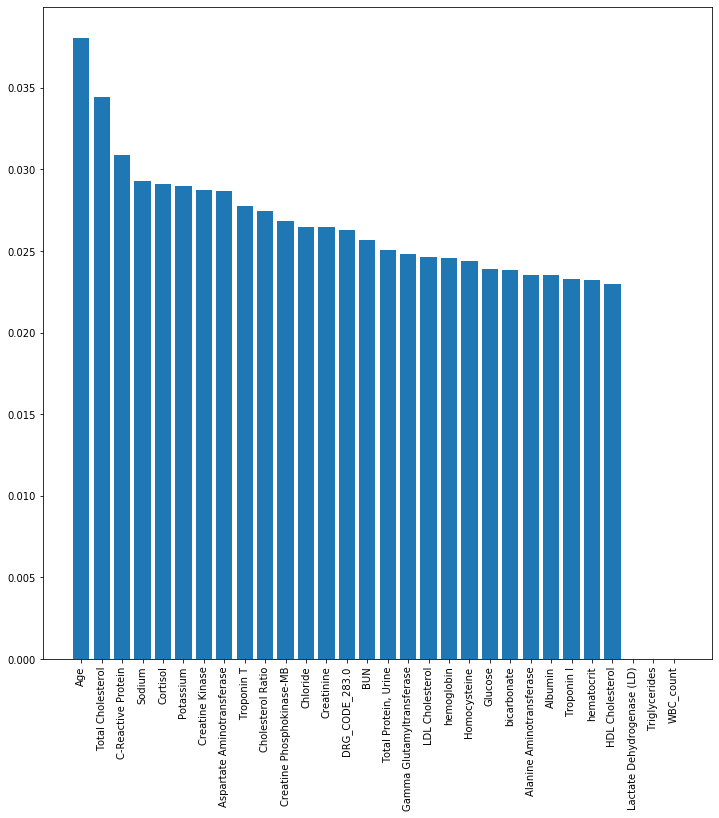

In [229]:
plt.figure(figsize=(12,12))
plt.bar(imp_comb_sort['names'],imp_comb_sort['imp'])
plt.xticks(rotation=90)



In [163]:
codes=[283.0, 237.0, 224.0, 223.0, 316.0, 296.0, 284.0, 298.0, 264.0,
              244.0, 236.0, 291.0, 308.0, 271.0, 318.0, 285.0, 299.0, 314.0,
              215.0, 239.0, 220.0, 297.0, 248.0, 222.0, 242.0, 263.0, 228.0,
              250.0, 252.0, 221.0]

In [181]:
drg_df=drg[(drg.DRG_CODE.isin(code))]

In [194]:
code=[int(i) for i in names]

In [201]:
drg_df[drg_df.DRG_CODE==248]

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
22548,23171,19080,132450,HCFA,248,"TENDINITIS, MYOSITIS & BURSITIS",NaN,NaN
28349,26771,11983,129454,HCFA,248,"TENDINITIS, MYOSITIS & BURSITIS",NaN,NaN
35779,33541,3491,152520,HCFA,248,"TENDINITIS, MYOSITIS & BURSITIS",NaN,NaN
36298,37557,1411,175346,HCFA,248,"TENDINITIS, MYOSITIS & BURSITIS",NaN,NaN
38239,43005,31336,148804,MS,248,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
40038,41712,27245,139474,MS,248,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
40612,42531,28354,147171,MS,248,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
42536,42228,32600,119757,MS,248,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
43190,50440,31797,105809,MS,248,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN
43363,46360,32319,164973,MS,248,PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT ...,NaN,NaN


In [237]:
pwd

'/home/shayantan'